In [1]:
%matplotlib inline

In [2]:
import re
import matplotlib
import matplotlib.pyplot as plt

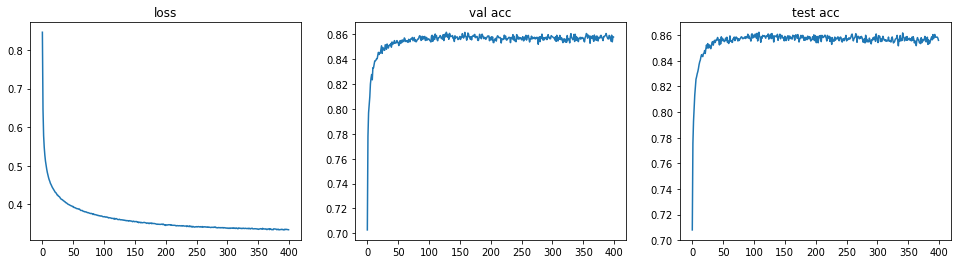

In [3]:
with open('results/results_7.txt') as sr:
    lines = sr.read().split('\n')[1:-1]
    fig, ax = plt.subplots(1, 3)
    fig.set_figwidth(16.5)
    ax[0].set_title('loss')
    ax[0].plot([float(re.search(r'loss: ([\d.]+)', line).group(1)) for line in lines])
    ax[1].set_title('val acc')
    ax[1].plot([float(re.search(r'val acc: ([\d.]+)', line).group(1)) for line in lines])
    ax[2].set_title('test acc')
    ax[2].plot([float(re.search(r'test acc: ([\d.]+)', line).group(1)) for line in lines])